# US Housing Market Analysis

In [72]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Loading and cleaning data
We will be using data from [US Housing Market Analysis: Supply-Demand Dynamics](https://www.kaggle.com/datasets/utkarshx27/factors-influence-house-price-in-us) on Kaggle. There are 2 csv files in this dataset: `supply.csv' and `demand.csv`. 

In [73]:
# Read in data
file_path = Path("data/supply.csv")
supply_df = pd.read_csv(file_path)
supply_df.head()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895


In [74]:
# Read in data
file_path = Path("data/demand.csv")
demand_df = pd.read_csv(file_path)
demand_df.head()

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,01-01-2003,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.298667,5.597500,98.000000,2.000000,212700,11923.447


In [75]:
# combine data
combined_df = pd.merge(supply_df, demand_df, on="DATE")
combined_df.head()

,DATE,CSUSHPISA_x,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,CSUSHPISA_y,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895,143.298667,5.597500,98.000000,2.000000,212700,11923.447


In [76]:
# rename CSUSHPISA_x to CSUSHPISA and drop CSUSHPISA_y
combined_df = combined_df.rename(columns={"CSUSHPISA_x": "CSUSHPISA"})
combined_df = combined_df.drop(columns=["CSUSHPISA_y"])
combined_df.head()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895,5.597500,98.000000,2.000000,212700,11923.447


In [77]:
# fill NaN values for INTDSRUSM193N with value from previous row
combined_df["INTDSRUSM193N"] = combined_df["INTDSRUSM193N"].fillna(method="ffill")


In [78]:
combined_df.head()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
76,01-01-2022,290.868,6.233333333,1864,910611,15166,3.822308,63.133333,0.25,433100,24740.480
77,01-04-2022,303.4226667,8.7,1734.666667,947300.3333,15286,5.266154,57.866667,0.25,449300,25248.476
78,01-07-2022,301.7263333,9.566666667,1610.666667,910346,15306,5.623077,56.100000,0.25,468000,25723.941
79,01-10-2022,297.8966667,9.2,1455.333333,870620.6667,14554,6.664615,58.800000,0.25,479500,26137.992
80,01-01-2023,.,8.033333333,1424.333333,842559.6667,15053,6.372308,64.633333,0.25,436800,26465.865


In [79]:
# replace the value of the last row of the 'CSUSHPISA' column with 294.30366667
combined_df.loc[combined_df.index[-1], "CSUSHPISA"] = "294.30366667"
combined_df.tail()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
76,01-01-2022,290.868,6.233333333,1864,910611,15166,3.822308,63.133333,0.25,433100,24740.480
77,01-04-2022,303.4226667,8.7,1734.666667,947300.3333,15286,5.266154,57.866667,0.25,449300,25248.476
78,01-07-2022,301.7263333,9.566666667,1610.666667,910346,15306,5.623077,56.100000,0.25,468000,25723.941
79,01-10-2022,297.8966667,9.2,1455.333333,870620.6667,14554,6.664615,58.800000,0.25,479500,26137.992
80,01-01-2023,294.30366667,8.033333333,1424.333333,842559.6667,15053,6.372308,64.633333,0.25,436800,26465.865


In [80]:
# create a new column for CSUSHPISA that is the value from the next row
combined_df["CSUSHPISA_NEXT_Q"] = combined_df["CSUSHPISA"].shift(-1)

In [81]:
combined_df.shape

(81, 12)

# Defining the feature and target variables

In [82]:
# Define features set
X = combined_df.copy()
X = X.drop("DATE", axis=1)
X = X.drop("CSUSHPISA", axis=1)
X = X.drop("CSUSHPISA_NEXT_Q", axis=1)
# drop last row
X = X[:-1]
X.tail()

,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
75,6.233333333,1816.666667,837069,14999,3.079231,69.900000,0.25,423600,24349.121
76,6.233333333,1864,910611,15166,3.822308,63.133333,0.25,433100,24740.480
77,8.7,1734.666667,947300.3333,15286,5.266154,57.866667,0.25,449300,25248.476
78,9.566666667,1610.666667,910346,15306,5.623077,56.100000,0.25,468000,25723.941
79,9.2,1455.333333,870620.6667,14554,6.664615,58.800000,0.25,479500,26137.992


In [83]:
# checking the shape of X and if there are any null values
print(X.shape)
print(X.isnull().sum())

(80, 9)
MSACSR            0
PERMIT            0
TLRESCONS         0
EVACANTUSQ176N    0
MORTGAGE30US      0
UMCSENT           0
INTDSRUSM193N     0
MSPUS             0
GDP               0
dtype: int64


# Creating the target vector CSUSHPISA = S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted)

In [84]:
# Define target vector
y = combined_df["CSUSHPISA_NEXT_Q"].values.reshape(-1, 1)
y = y[:-1]
y[:5]

array([['131.756'],
       ['135.013'],
       ['138.8356667'],
       ['143.2986667'],
       ['148.209']], dtype=object)

# Splitting the data into training and testing sets

In [85]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [86]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [87]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [88]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Fitting the Random Forest model

Having scaled the data, we can now fit the Random Forest model to the training data.

In [89]:
# create the random forrest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
# fit the model
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

# Making predictions with the Random Forest model

In [90]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [91]:
# compare predictions to actual values
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")


First 10 Predictions:   ['157.5353333' '201.4513333' '143.2986667' '142.2863333' '178.2613333'
 '170.8803333' '131.756' '169.3473333' '277.317' '195.9763333']
First 10 Actual labels: [['152.7166667'], ['199.1546667'], ['148.209'], ['140.1133333'], ['175.37'], ['172.9643333'], ['135.013'], ['174.58'], ['290.868'], ['192.6373333']]


# Evaluating the Random Forest model

In [92]:
# chart of predictions vs actual
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()})
# change the datatypes to float
results_df = results_df.astype("float64")
# add a column for the difference between the prediction and actual
results_df["Difference"] = results_df["Actual"] - results_df["Prediction"]
# add a column for the percent difference between the prediction and actual
results_df["Percent Difference"] = results_df["Difference"] / results_df["Actual"] * 100
# find the highest percent difference
results_df["Percent Difference"].max()
results_df.head(10)

,Prediction,Actual,Difference,Percent Difference
0,157.535333,152.716667,-4.818667,-3.155298
1,201.451333,199.154667,-2.296667,-1.153208
2,143.298667,148.209000,4.910333,3.313114
3,142.286333,140.113333,-2.173000,-1.550887
4,178.261333,175.370000,-2.891333,-1.648705
5,170.880333,172.964333,2.084000,1.204873
6,131.756000,135.013000,3.257000,2.412360
7,169.347333,174.580000,5.232667,2.997289
8,277.317000,290.868000,13.551000,4.658814
9,195.976333,192.637333,-3.339000,-1.733309


In [93]:
# calculate the mean absolute error (MAE)
mae = results_df["Difference"].mean()
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.10703335499999725


In [94]:
# calculate the mean squared error (MSE)
mse = results_df["Difference"].apply(lambda x: x**2).mean()
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 22.510704025749995


In [95]:
# calculate the root mean squared error (RMSE)
rmse = mse**(0.5)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 4.744544659474711


In [96]:
# calculate the mean absolute percent error (MAPE)
mape = results_df["Percent Difference"].abs().mean()
print(f"Mean Absolute Percent Error: {mape}")


Mean Absolute Percent Error: 2.211006289574698


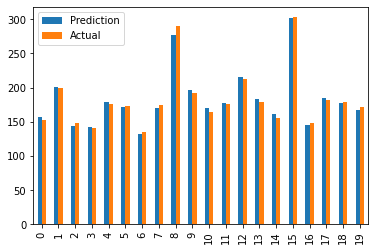

In [97]:
# make a graph of the predictions vs actual with percent difference
results_df.plot(y=["Prediction", "Actual"], kind="bar")
# save the graph
plt.savefig("images/predictions_vs_actual.png")
plt.show()


In [98]:
# Evaluating the Random Forest model
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")


Accuracy Score : 0.0


# Feature importance

In [99]:
# get the feature importance array
importances = rf_model.feature_importances_
# list of features
feature_list = list(X.columns)
# sort the features by their importance
sorted(zip(rf_model.feature_importances_, feature_list), reverse=True)
# print the feature importance
for feature in zip(feature_list, rf_model.feature_importances_):
    print(f"{feature[0]}: ({feature[1]})")
    

MSACSR: (0.1157124383656957)
PERMIT: (0.11819003422228685)
TLRESCONS: (0.11490912356832687)
EVACANTUSQ176N: (0.11273669523029604)
MORTGAGE30US: (0.12209144436268958)
UMCSENT: (0.12574255466897297)
INTDSRUSM193N: (0.07019772212856777)
MSPUS: (0.10999078072966399)
GDP: (0.11042920672350023)


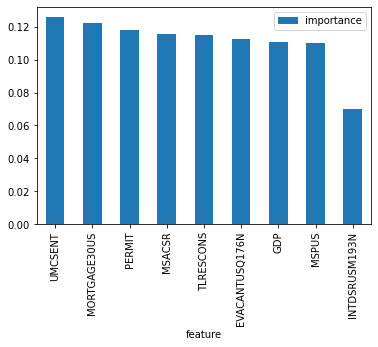

In [100]:
# add the feature importance to a dataframe
feature_importance_df = pd.DataFrame({"feature": feature_list, "importance": importances})
# sort the dataframe by the importance
feature_importance_df = feature_importance_df.sort_values("importance", ascending=False)
# set the index to be the feature
feature_importance_df = feature_importance_df.set_index("feature", drop=True)
# plot the feature importance
feature_importance_df.plot(kind="bar")
# save the graph
plt.savefig("images/feature_importance2.png")
plt.show()

In [101]:
# add the predictions to the dataframe
X_scaled = X_scaler.transform(X)
combined_df_predictions = combined_df.copy()
# drop the first row
combined_df_predictions = combined_df_predictions.iloc[1:]
# add the predictions to the dataframe
combined_df_predictions["PREDICTION_NEXTQ"] = rf_model.predict(X_scaled)
# remove the CSUSHPISA_NEXT_Q column
combined_df_predictions = combined_df_predictions.drop(columns=["CSUSHPISA_NEXT_Q"])
combined_df_predictions


,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP,PREDICTION_NEXTQ
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244,5.506923,89.266667,2.166667,191800,11312.766,131.756
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614,6.033846,89.300000,2.000000,191900,11566.669,131.756
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654,5.919286,91.966667,2.000000,198800,11772.234,138.8356667
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895,5.597500,98.000000,2.000000,212700,11923.447,143.2986667
5,01-04-2004,148.209,3.9,2080,526483.3333,16079,6.106154,93.333333,2.083333,217600,12112.815,143.2986667
...,...,...,...,...,...,...,...,...,...,...,...,...
76,01-01-2022,290.868,6.233333333,1864,910611,15166,3.822308,63.133333,0.250000,433100,24740.480,277.317
77,01-04-2022,303.4226667,8.7,1734.666667,947300.3333,15286,5.266154,57.866667,0.250000,449300,25248.476,301.7263333
78,01-07-2022,301.7263333,9.566666667,1610.666667,910346,15306,5.623077,56.100000,0.250000,468000,25723.941,301.7263333
79,01-10-2022,297.8966667,9.2,1455.333333,870620.6667,14554,6.664615,58.800000,0.250000,479500,26137.992,297.8966667
